# Radarx Tutorial
- Author: [@syedhamidali](https://github.com/syedhamidali)

Before working with this notebook, make sure to familiarize yourself with [Radarx](https://radarx.readthedocs.io), [Xradar](https://xradar.rtfd.io), and [Xarray](https://docs.xarray.dev). 

We will use [Radarx](https://radarx.readthedocs.io) to process IMD radar data. Note that `radarx` is built on Xarray's DataTree and Dataset structures. To learn more about Xarray's DataTree, Dataset, or DataArray, please refer to the [Xarray documentation](https://docs.xarray.dev).

## Imports

In [31]:
import os
import glob
import cmweather
import numpy as np
import xarray as xr
import xradar as xd
import radarx as rx
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

## Setup working directories

In [2]:
basedir = "/Users/syed44/Downloads/Others/IMD_JAIPUR/"
data_dir = os.path.join(basedir, "JPR220822IMD-B")
out_dir = os.path.join(basedir, "CFRAD")
os.makedirs(out_dir, exist_ok=True)

## List available files

In [3]:
files = sorted(glob.glob(os.path.join(data_dir, "JPR*nc*")))
print(f"Number of sweeps: {len(files)}")

Number of sweeps: 1210


Let's see how our data files look like, here we are listing first 11 files only to see the file name pattern

In [4]:
for file in files[:11]:
    print(file)

/Users/syed44/Downloads/Others/IMD_JAIPUR/JPR220822IMD-B/JPR220822000253-IMD-B.nc
/Users/syed44/Downloads/Others/IMD_JAIPUR/JPR220822IMD-B/JPR220822000253-IMD-B.nc.1
/Users/syed44/Downloads/Others/IMD_JAIPUR/JPR220822IMD-B/JPR220822000253-IMD-B.nc.2
/Users/syed44/Downloads/Others/IMD_JAIPUR/JPR220822IMD-B/JPR220822000253-IMD-B.nc.3
/Users/syed44/Downloads/Others/IMD_JAIPUR/JPR220822IMD-B/JPR220822000253-IMD-B.nc.4
/Users/syed44/Downloads/Others/IMD_JAIPUR/JPR220822IMD-B/JPR220822000253-IMD-B.nc.5
/Users/syed44/Downloads/Others/IMD_JAIPUR/JPR220822IMD-B/JPR220822000253-IMD-B.nc.6
/Users/syed44/Downloads/Others/IMD_JAIPUR/JPR220822IMD-B/JPR220822000253-IMD-B.nc.7
/Users/syed44/Downloads/Others/IMD_JAIPUR/JPR220822IMD-B/JPR220822000253-IMD-B.nc.8
/Users/syed44/Downloads/Others/IMD_JAIPUR/JPR220822IMD-B/JPR220822000253-IMD-B.nc.9
/Users/syed44/Downloads/Others/IMD_JAIPUR/JPR220822IMD-B/JPR220822001242-IMD-B.nc


<div class="alert alert-block alert-info">
So, it is clear that each radar volume consists of 10 sweeps. Let's transform these sweeps to cfradial formats
</div>

## Read data

In [5]:
dtree = rx.io.read_volume(files)

INFO:radarx.io.imd:Successfully grouped files into 121 sweep groups.


In [6]:
dtree.groups

('/',
 '/volume_0',
 '/volume_1',
 '/volume_2',
 '/volume_3',
 '/volume_4',
 '/volume_5',
 '/volume_6',
 '/volume_7',
 '/volume_8',
 '/volume_9',
 '/volume_10',
 '/volume_11',
 '/volume_12',
 '/volume_13',
 '/volume_14',
 '/volume_15',
 '/volume_16',
 '/volume_17',
 '/volume_18',
 '/volume_19',
 '/volume_20',
 '/volume_21',
 '/volume_22',
 '/volume_23',
 '/volume_24',
 '/volume_25',
 '/volume_26',
 '/volume_27',
 '/volume_28',
 '/volume_29',
 '/volume_30',
 '/volume_31',
 '/volume_32',
 '/volume_33',
 '/volume_34',
 '/volume_35',
 '/volume_36',
 '/volume_37',
 '/volume_38',
 '/volume_39',
 '/volume_40',
 '/volume_41',
 '/volume_42',
 '/volume_43',
 '/volume_44',
 '/volume_45',
 '/volume_46',
 '/volume_47',
 '/volume_48',
 '/volume_49',
 '/volume_50',
 '/volume_51',
 '/volume_52',
 '/volume_53',
 '/volume_54',
 '/volume_55',
 '/volume_56',
 '/volume_57',
 '/volume_58',
 '/volume_59',
 '/volume_60',
 '/volume_61',
 '/volume_62',
 '/volume_63',
 '/volume_64',
 '/volume_65',
 '/volume_66',

<div class="alert alert-block alert-info">
We have successfully read the data using `radarx` and is automatically loaded into cfradial1 format. At this stage we can do whatever we want with the data, for example plotting, filtering, or simply storing it to cfradial1 format so that it can be later used with `pyart`, `xradar`, or `wradlib`
</div>

Let's just write the ouput of this data into cfradial1 format and, then use xradar to eplore it further.

In [19]:
for vol in dtree.match("volume_*"):
    ds = dtree[vol].to_dataset()
    time = ds.time.min().dt.strftime("%Y%m%d_%H%M%S").item()
    filename = "cfrad1_JPR_"+ time + ".nc"
    out_file = os.path.join(out_dir, filename)
    ds.to_netcdf(out_file)
    print(f"Successfully saved {filename}")
    break # remove or comment this `break` in order to save all the data, we are just saving one file here

Successfully saved cfrad1_JPR_20220822_000253.nc


In [20]:
os.listdir(out_dir)

['cfrad1_JPR_20220822_000253.nc']

Now that we have saved one file to cfradial1 format, let's use xradar to read that file

## Read with Xradar

In [22]:
cf_files = sorted(glob.glob(out_dir+"/*"))
cf_files

['/Users/syed44/Downloads/Others/IMD_JAIPUR/CFRAD/cfrad1_JPR_20220822_000253.nc']

In [23]:
dtree = xd.io.open_cfradial1_datatree(cf_files[0])

In [24]:
dtree.groups

('/',
 '/sweep_0',
 '/sweep_1',
 '/sweep_2',
 '/sweep_3',
 '/sweep_4',
 '/sweep_5',
 '/sweep_6',
 '/sweep_7',
 '/sweep_8',
 '/sweep_9',
 '/radar_parameters',
 '/georeferencing_correction',
 '/radar_calibration')

Let's Explore the data

In [26]:
# Assign x,y and, z coordinates to radar
dtree = dtree.xradar.georeference()

In [35]:
dtree['sweep_0']

<xarray.DataTree 'sweep_0'>
Group: /sweep_0
    Dimensions:            (time: 3600, sweep: 10, azimuth: 360, range: 999)
    Coordinates:
      * azimuth            (azimuth) float32 1kB 1.126 1.989 3.142 ... 359.1 360.0
        elevation          (azimuth) float32 1kB 0.5109 0.5109 ... 0.5109 0.5109
        time               (azimuth) datetime64[ns] 3kB 2022-08-22T00:03:05 ... 2...
      * range              (range) float64 8kB 300.0 550.0 ... 2.496e+05 2.498e+05
        latitude           float32 4B 26.82
        longitude          float32 4B 75.82
        altitude           float32 4B 399.0
        crs_wkt            int64 8B 0
        x                  (azimuth, range) float64 3MB 5.895 10.81 ... -47.93
        y                  (azimuth, range) float64 3MB 299.9 549.8 ... 2.496e+05
        z                  (azimuth, range) float64 3MB 401.7 403.9 ... 6.295e+03
    Dimensions without coordinates: sweep
    Data variables:
        altitude_agl       (azimuth) float32 1kB ...
        beamWidthVert      (azimuth) float32 1kB ...
        DBT                (azimuth, range) float32 1MB ...
        DBZ                (azimuth, range) float32 1MB ...
        VEL                (azimuth, range) float32 1MB ...
        WIDTH              (azimuth, range) float32 1MB ...
        ZDR                (azimuth, range) float32 1MB ...
        HCLASS             (azimuth, range) float32 1MB ...
        ray_gate_spacing   (azimuth) float32 1kB ...
        sweep_fixed_angle  float32 4B ...
        sweep_mode         <U20 80B 'azimuth_surveillance'
        sweep_number       int64 8B ...

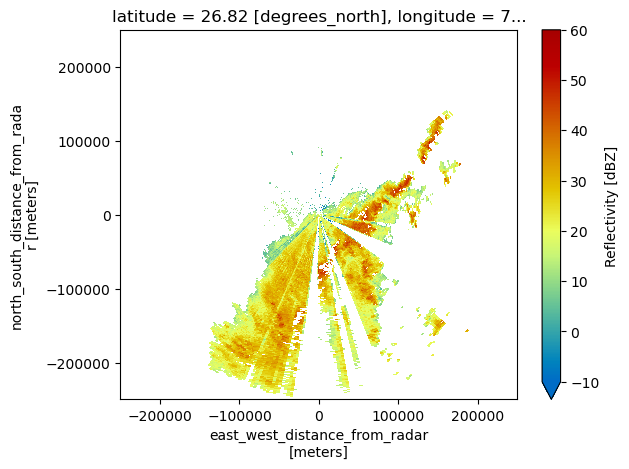

In [32]:
dtree['sweep_0']['DBZ'].plot(x='x', y='y', vmin=-10, vmax=60, cmap='HomeyerRainbow')

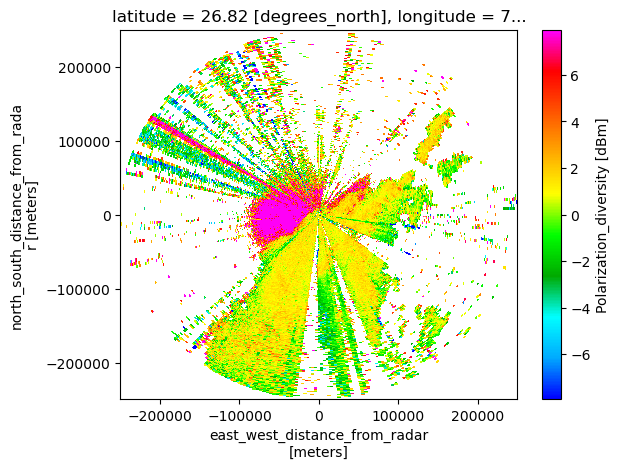

In [34]:
dtree['sweep_0']['ZDR'].plot(x='x', y='y', cmap='RefDiff')

We can plot Max-CAPPI using `radarx`, but for that we have to grid the data.

In [41]:
help(dtree.radarx.to_grid)

Help on method to_grid in module radarx.accessors:

to_grid(data_vars=None, pseudo_cappi=True, x_lim=(-100000.0, 100000.0), y_lim=(-100000.0, 100000.0), z_lim=(0, 10000.0), x_step=1000, y_step=1000, z_step=250, x_smth=0.2, y_smth=0.2, z_smth=1) method of radarx.accessors.RadarxDataTreeAccessor instance



In [61]:
xlim = 250e3
zlim = (0, 10000)
hres = 1000
vres = 250

ds = dtree.radarx.to_grid(data_vars=['DBZ', 'ZDR', 'VEL'],
                          pseudo_cappi=False,
                          x_lim=(-xlim, xlim),
                          y_lim=(-xlim, xlim),
                          z_lim=zlim,
                          x_step=hres,
                          y_step=hres,
                          z_step=vres,
                          x_smth=0.5,
                          y_smth=0.5,
                          z_smth=4,)

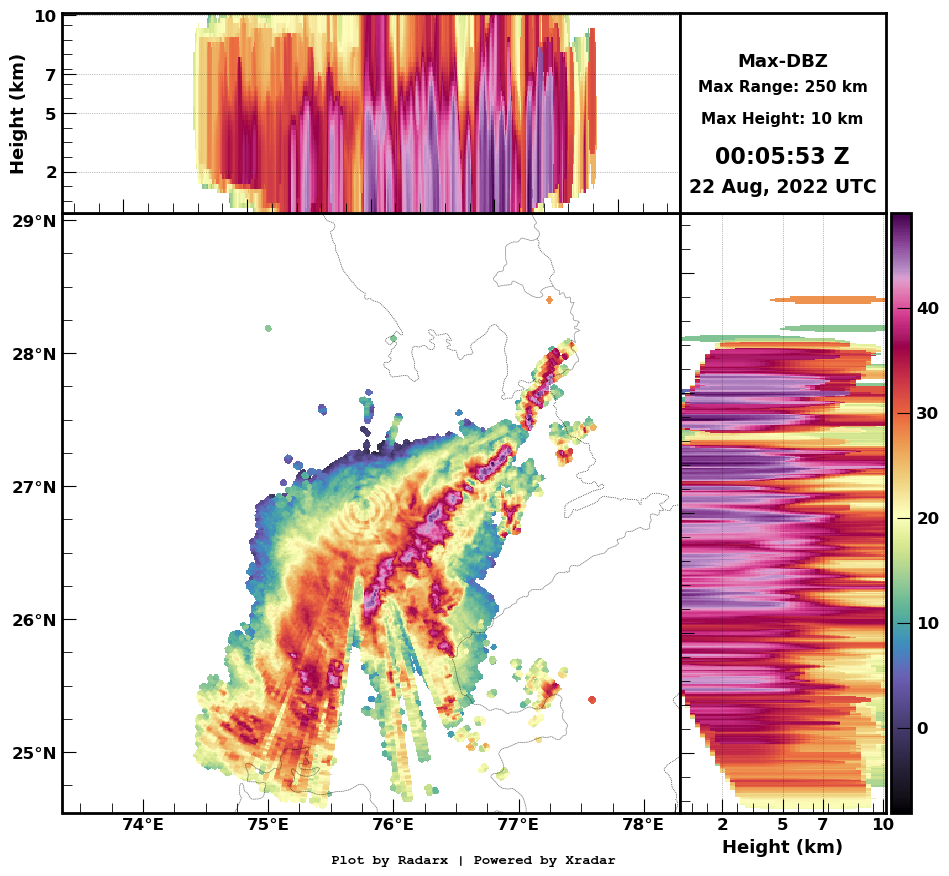

In [62]:
ds.radarx.plot_max_cappi('DBZ', add_slogan=True)

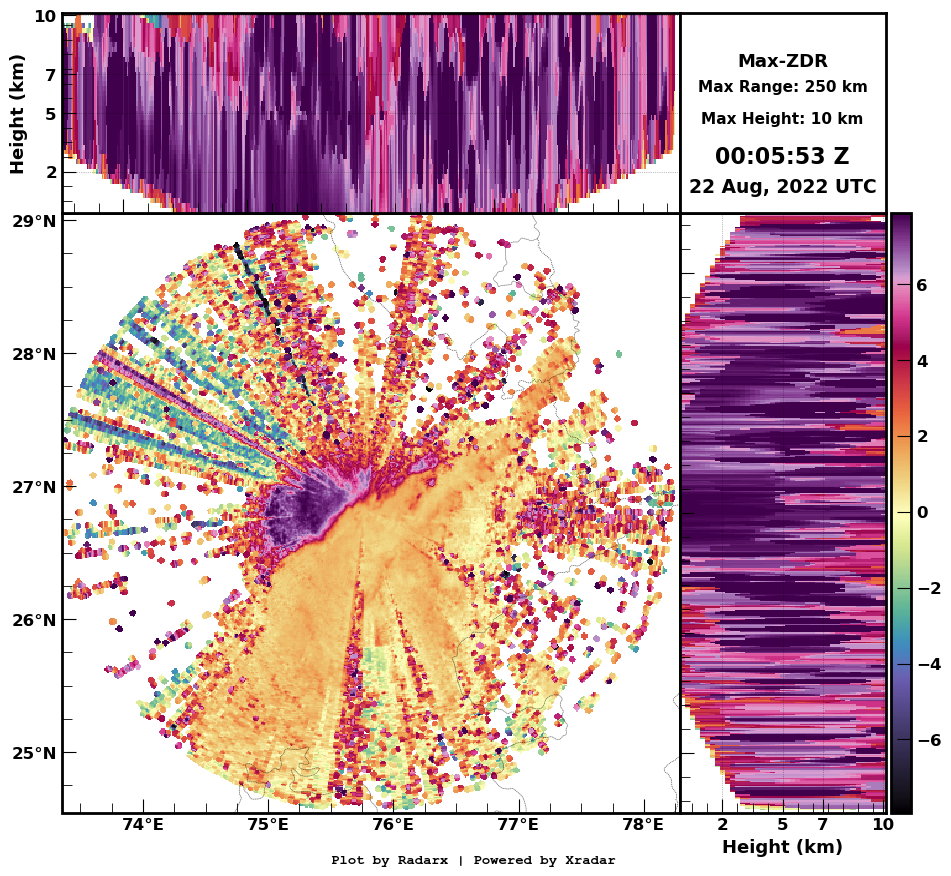

In [56]:
ds.radarx.plot_max_cappi('ZDR', add_slogan=True)

ZDR values exceeding 6 suggest highly horizontally elongated scatterers, which is plausible. However, the absence of RHOHV data makes it impossible to confirm whether these are meteorological or non-meteorological scatterers. Applying filters could help mitigate this uncertainty.

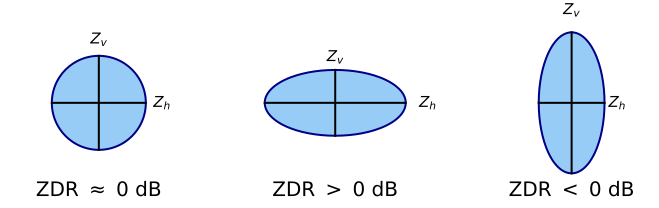

In [63]:
ds['ZDR'] = ds.where((ds.DBZ>-11) & (ds.DBZ<65))['ZDR']

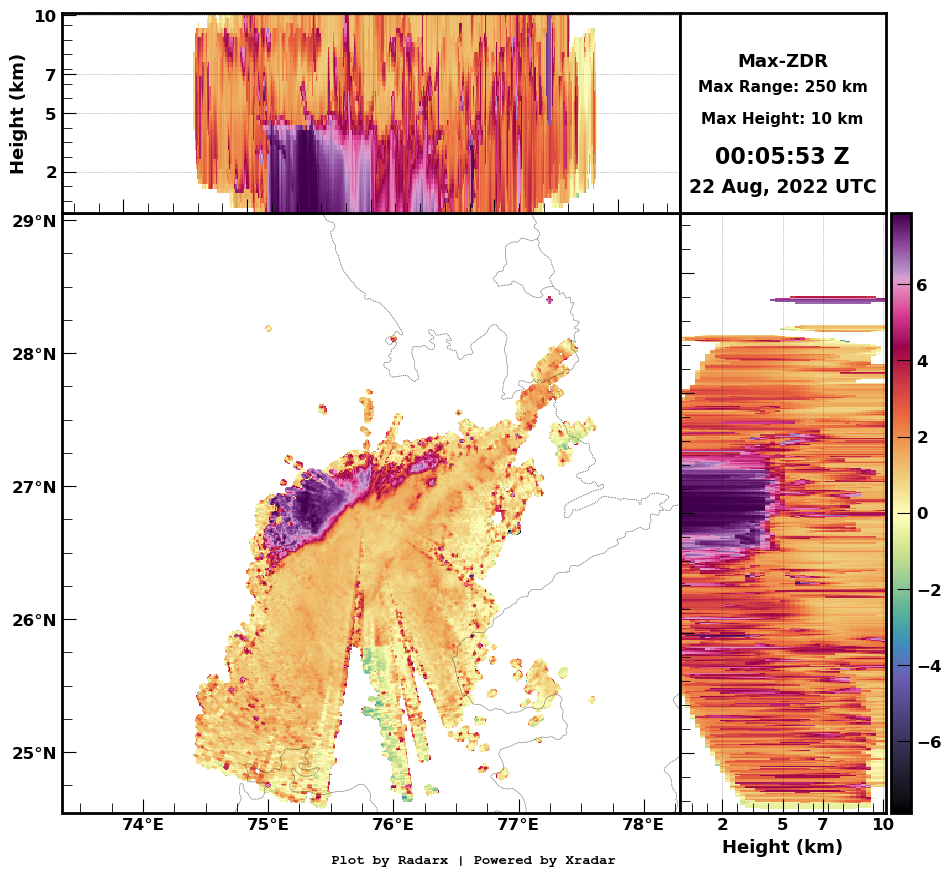

In [64]:
ds.radarx.plot_max_cappi('ZDR', add_slogan=True)